In [9]:
import numpy as np
import time
import random
import matlab.engine 
eng=matlab.engine.start_matlab()
eng = matlab.engine.start_matlab("-desktop")

In [10]:
def func(x):    
    x1, x2, x3 = x
    fcost=eng.HHmododeslizante2(float(x1),float(x2),float(x3))    
    return fcost


best_x is  [7.24068574e+01 1.00000000e-04 1.12861169e+00] best_y is [0.00797343]


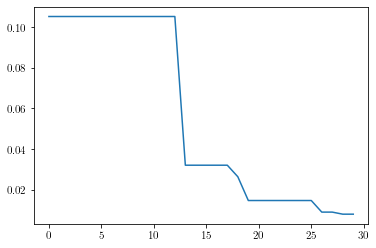

In [12]:
# %% Do PSO
from sko.PSO import PSO

pso = PSO(func=func, n_dim=3, pop=20, max_iter=30, lb=[0.1, 0.0, 0.1], ub=[100.0, 1.5, 5.0], w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# %% Plot the result
import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()

In [16]:
# %%
from sko.GA import GA

ga = GA(func=func, n_dim=3, size_pop=50, max_iter=300, prob_mut=0.001, lb=[0.1, 0.0, 0.1], ub=[100.0, 1.5, 5.0], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)


best_x: [6.39643797e+01 3.30028804e-04 9.43859645e-01] 
 best_y: [0.12459795]


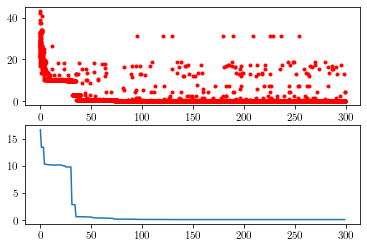

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()